# Final Project Analysis Example using Thicket

In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd
import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [2]:
#strong scaling
# tk = th.Thicket.from_caliperreader(glob("*-a65536-*.cali"))
# tk = th.Thicket.from_caliperreader(glob("*-a262144-*.cali"))
# tk = th.Thicket.from_caliperreader(glob("*-a1048576-*.cali"))
# tk = th.Thicket.from_caliperreader(glob("*-a4194304-*.cali"))
# tk = th.Thicket.from_caliperreader(glob("*-a16777216-*.cali"))
# tk = th.Thicket.from_caliperreader(glob("*-a67108864-*.cali"))
# tk = th.Thicket.from_caliperreader(glob("*-a268435456-*.cali"))

#speedup and weak
# tk = th.Thicket.from_caliperreader(glob("*-i1*.cali"))
# tk = th.Thicket.from_caliperreader(glob("*-i2*.cali"))
# tk = th.Thicket.from_caliperreader(glob("*-i3*.cali"))
tk = th.Thicket.from_caliperreader(glob("*-i4*.cali"))
tk.dataframe = tk.dataframe.drop(["nid", "spot.channel", "Total time", "Min time/rank", "Max time/rank", "Variance time/rank"], axis=1)#,"Avg time/rank", "Min time/rank", "Max time/rank", "Total time"
tk.dataframe

Avg time/rank  \
node                                              profile                     
{'name': 'main', 'type': 'function'}              26865850         0.758977   
                                                  91589203        96.218201   
                                                  199775509       27.583349   
                                                  252601885        1.515739   
                                                  354753638       12.486089   
                                                  355165401        7.635262   
                                                  415101595        3.294865   
                                                  418137737        1.365311   
                                                  479771915        3.415886   
                                                  529131526        4.302870   
                                                  554940394        5.475341   
                                                  592408525       96.229456   
                                                  593509624        2.952198   
                                                  623049743        3.935322   
                                                  669730876        3.457300   
                                                  692177343        1.352601   
                                                  699309909        0.918627   
                                                  699422876        4.318882   
                                                  724851361        3.118053   
                                                  751740264       97.383134   
                                                  755558628        1.566232   
                                                  849997489        1.383738   
                                                  863712879        0.525776   
                                                  921191458        3.824562   
                                                  1113195718       3.815707   
                                                  1392686553       8.386193   
                                                  1424133250      98.152294   
                                                  1453803686       4.115092   
                                                  1544687043       0.651926   
                                                  1574321060       3.376396   
                                                  1658662653      51.712006   
                                                  1937678388       2.744430   
                                                  2184197636       0.411361   
                                                  2239317519       4.187144   
                                                  2247765503      24.735449   
                                                  2273559652       6.738156   
                                                  2294200978      24.845988   
                                                  2310003528      12.172790   
                                                  2353398429       0.540432   
                                                  2420916316       0.533113   
                                                  2454338759      11.142181   
                                                  2517309925       4.633368   
                                                  2581687639       6.374083   
                                                  2593624457       1.139014   
                                                  2634127945       5.901956   
                                                  2764595640      48.859440   
                                                  2826818319       2.742861   
                                                  2908925362      56.738878   
                                                  2944864345       0.370311   
                                 

In [3]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:time.variance,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,group_num,implementation_source,data_init_time,correctness_check,mpi_barrier,comm,comp,comm_large,comp_large,mpi_scatter,mpi_gather,main
profile,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
26865850,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p2-a1048576-i4.cali,true,1701240843,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./merge, 1048576, 4]",c,MergeSort,MPI,int,4,1048576,4,2,10,Online,data_init,correctness_check,MPI_Barrier,comm,comp,comm_large,comp_large,MPI_Scatter,MPI_Gather,main
91589203,2.11.0-dev,256,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p256-a268435456-i4.cali,true,1701245268,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./merge, 268435456, 4]",c,MergeSort,MPI,int,4,268435456,4,256,10,Online,data_init,correctness_check,MPI_Barrier,comm,comp,comm_large,comp_large,MPI_Scatter,MPI_Gather,main
199775509,2.11.0-dev,1024,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p1024-a67108864-i4.cali,true,1701243744,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./merge, 67108864, 4]",c,MergeSort,MPI,int,4,67108864,4,1024,10,Online,data_init,correctness_check,MPI_Barrier,comm,comp,comm_large,comp_large,MPI_Scatter,MPI_Gather,main
252601885,2.11.0-dev,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p32-a1048576-i4.cali,true,1701240860,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./merge, 1048576, 4]",c,MergeSort,MPI,int,4,1048576,4,32,10,Online,data_init,correctness_check,MPI_Barrier,comm,comp,comm_large,comp_large,MPI_Scatter,MPI_Gather,main
354753638,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p8-a67108864-i4.cali,true,1701244930,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./merge, 67108864, 4]",c,MergeSort,MPI,int,4,67108864,4,8,10,Online,data_init,correctness_check,MPI_Barrier,comm,comp,comm_large,comp_large,MPI_Scatter,MPI_Gather,main
355165401,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p64-a16777216-i4.cali,true,1701244623,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./merge, 16777216, 4]",c,MergeSort,MPI,int,4,16777216,4,64,10,Online,data_init,correctness_check,MPI_Barrier,comm,comp,comm_large,comp_large,MPI_Scatter,MPI_Gather,main
415101595,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p8-a16777216-i4.cali,true,1701244624,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./merge, 16777216, 4]",c,MergeSort,MPI,int,4,16777216,4,8,10,Online,data_init,correctness_check,MPI_Barrier,comm,comp,comm_large,comp_large,MPI_Scatter,MPI_Gather,main
418137737,2.11.0-dev,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p32-a65536-i4.cali,true,1701239754,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./merge, 65536, 4]",c,MergeSort,MPI,int,4,65536,4,32,10,Online,data_init,correctness_check,MPI_Barrier,comm,comp,comm_large,comp_large,MPI_Scatter,MPI_Gather,main
479771915,2.11.0-dev,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p16-a16777216-i4.cali,true,1701244624,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./merge, 16777216, 4]",c,MergeSort,MPI,int,4,16777216,4,16,10,Online,data_init,correctness_check,MPI_Barrier,comm,comp,comm_large,comp_large,MPI_Scatter,MPI_Gather,main


In [4]:
tk.statsframe.dataframe["time"] = 1
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  ├─ 1.000 MPI_Barrier
│  └─ 1.000 comm_large
│     ├─ 1.000 MPI_Gather
│     └─ 1.000 MPI_Scatter
├─ 1.000 comp
│  └─ 1.000 comp_large
├─ 1.000 correctness_check
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [5]:
tk.metadata.columns

Index(['cali.caliper.version', 'mpi.world.size', 'spot.metrics',
       'spot.timeseries.metrics', 'spot.format.version', 'spot.options',
       'spot.channels', 'cali.channel', 'spot:node.order', 'spot:output',
       'spot:time.variance', 'launchdate', 'libraries', 'cmdline', 'cluster',
       'Algorithm', 'ProgrammingModel', 'Datatype', 'SizeOfDatatype',
       'InputSize', 'InputType', 'num_procs', 'group_num',
       'implementation_source', 'data_init_time', 'correctness_check',
       'mpi_barrier', 'comm', 'comp', 'comm_large', 'comp_large',
       'mpi_scatter', 'mpi_gather', 'main'],
      dtype='object')

In [6]:
# gb = tk.groupby("InputType")
gb = tk.groupby("InputSize")

7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b766aa0e2e0>, 262144: <thicket.thicket.Thicket object at 0x2b766aa10400>, 1048576: <thicket.thicket.Thicket object at 0x2b766ab1bac0>, 4194304: <thicket.thicket.Thicket object at 0x2b766a9db3a0>, 16777216: <thicket.thicket.Thicket object at 0x2b766abb8310>, 67108864: <thicket.thicket.Thicket object at 0x2b766ab9aac0>, 268435456: <thicket.thicket.Thicket object at 0x2b766abb8490>}


In [7]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
     metadata_key="num_procs"
)

In [8]:
ctk.dataframe

65536  \
                                                            Avg time/rank   
node                                              num_procs                 
{'name': 'main', 'type': 'function'}              2              0.514849   
                                                  4              0.370311   
                                                  8              0.493464   
                                                  16             0.761138   
                                                  32             1.365311   
                                                  64             2.744430   
                                                  128            2.952198   
                                                  256            3.376396   
                                                  512            4.318882   
                                                  1024           5.901956   
{'name': 'comm', 'type': 'function'}              2              0.006470   
                                                  4              0.006785   
                                                  8              0.007888   
                                                  16             0.012282   
                                                  32             0.059432   
                                                  64             0.025363   
                                                  128            0.060783   
                                                  256            0.108656   
                                                  512            0.175033   
                                                  1024           0.265352   
{'name': 'MPI_Barrier', 'type': 'function'}       2              0.003647   
                                                  4              0.005817   
                                                  8              0.007052   
                                                  16             0.009158   
                                                  32             0.027270   
                                                  64             0.018126   
                                                  128            0.012971   
                                                  256            0.080313   
                                                  512            0.057766   
                                                  1024           0.109299   
{'name': 'comm_large', 'type': 'function'}        2              0.002773   
                                                  4              0.000916   
                                                  8              0.000787   
                                                  16             0.003074   
                                                  32             0.032108   
                                                  64             0.007188   
                                                  128            0.047336   
                                                  256            0.028220   
                                                  512            0.117163   
                                                  1024           0.155973   
{'name': 'MPI_Gather', 'type': 'function'}        2              0.000348   
                                                  4              0.000379   
                                                  8              0.000269   
                                                  16             0.000338   
                                                  32             0.001669   
                                                  64             0.000258   
                                                  128            0.000206   
                                                  256            0.003900   
                                                  512            0.000947   
                                                  1024          

In [9]:
# Drop unwanted columns
ctk.dataframe = ctk.dataframe.reset_index().drop(("node"), axis=1)
# Rename index to remove tuple
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])
# Drop "time" label as it is redundant
#ctk.dataframe.columns = ctk.dataframe.columns.droplevel(1)

<ipython-input-9-3f707aad634b>:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ctk.dataframe = ctk.dataframe.reset_index().drop(("node"), axis=1)


In [10]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
num_procs = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
input_sizes = sorted(list(set(ctk.dataframe.columns.get_level_values(0))))

In [11]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(df.columns)
    plt.grid(True)
    #plt.yscale("log", base=10)
   # plt.xscale("log", base=2)
    plt.xticks(num_procs)
    plt.show()
    return fig, ax

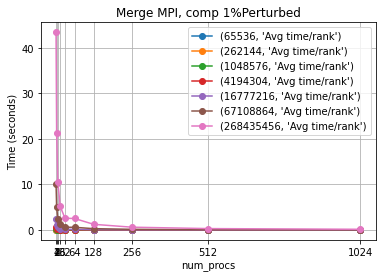

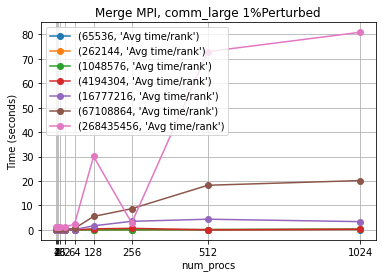

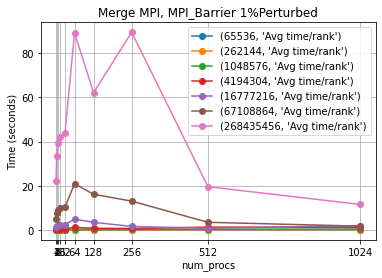

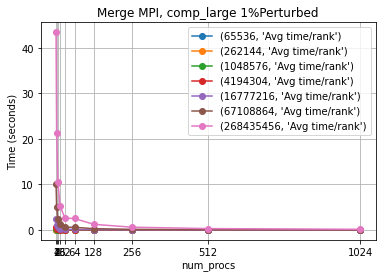

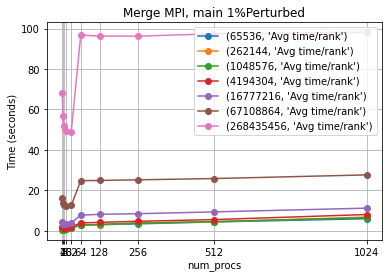

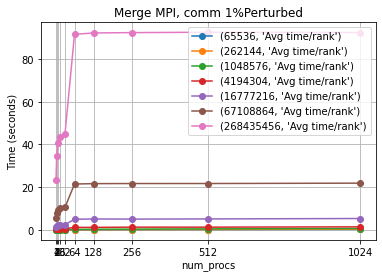

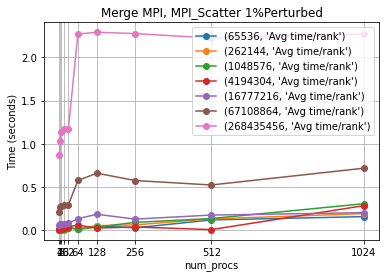

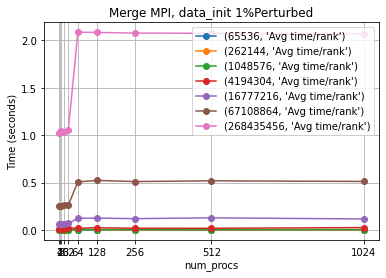

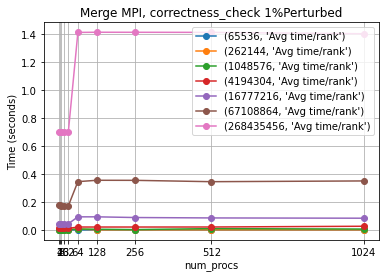

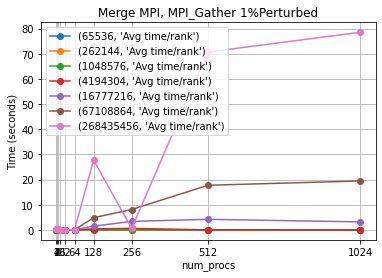

In [12]:
for name in function_names:
     #for size in input_sizes:
        plot_mpl(
            df=ctk.dataframe.loc[name],
            title=f"Merge MPI, {name} 1%Perturbed", 
            xlabel="num_procs",
            ylabel="Time (seconds)",
        )

In [17]:
# speedup=ctk.dataframe.loc["main",2]/ctk.dataframe.loc["main"]
# speedup=ctk.dataframe.loc["comp_large",2]/ctk.dataframe.loc["comp_large"]
speedup=ctk.dataframe.loc["comm",2]/ctk.dataframe.loc["comm"]
speedup

,65536,262144,1048576,4194304,16777216,67108864,268435456
,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank
num_procs,,,,,,,
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,0.953574,0.608518,0.679828,0.673250,0.668574,0.669673,0.671259
8,0.820233,0.571482,0.578960,0.578571,0.576075,0.573917,0.573592
16,0.526787,0.499881,0.543016,0.539921,0.537827,0.534835,0.535145
32,0.108864,0.223723,0.401855,0.502590,0.515675,0.517106,0.516509
64,0.255096,0.192902,0.258518,0.248605,0.255376,0.253714,0.253676
128,0.106444,0.142758,0.225817,0.249625,0.249469,0.251547,0.251944
256,0.059546,0.110645,0.194453,0.229478,0.252232,0.250965,0.251500


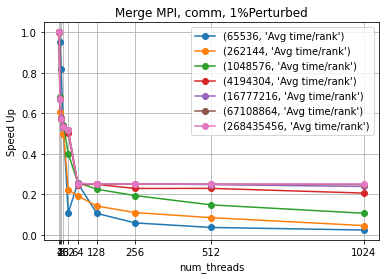

(<Figure size 432x288 with 1 Axes>,
 <Axes: title={'center': 'Merge MPI, comm, 1%Perturbed'}, xlabel='num_threads', ylabel='Speed Up'>)

In [18]:
plot_mpl(
    df=speedup,
    title=f"Merge MPI, comm, 1%Perturbed", 
    xlabel="num_threads",
    ylabel="Speed Up",
)